In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

path='D:/Projects/Capstone/'
filename=path+'day_total_incidents-weather.csv'
intervention=pd.read_csv(filename,encoding='ISO-8859-1')


In [2]:
intervention.head()

,Day,Total incidents,Avg_Temp,Avg_Dew_Point,Avg_Hum,Avg_Wind_speed
0,1/1/2013,414,-10.233333,-14.458333,69.000000,5.458333
1,1/1/2014,427,-17.925000,-23.666667,59.083333,6.041667
2,1/1/2015,411,-5.112500,-8.250000,76.333333,10.458333
3,1/1/2016,361,-1.479167,-2.875000,87.541667,5.166667
4,1/1/2017,395,-2.704167,-5.291667,80.875000,4.791667


In [3]:
intervention.columns=['Date_time','total_fire','Temp','Dew_P','Hum','Wind']


In [4]:
intervention.shape

(1877, 6)

In [5]:
intervention.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1877 entries, 0 to 1876
Data columns (total 6 columns):
Date_time     1877 non-null object
total_fire    1877 non-null int64
Temp          1857 non-null float64
Dew_P         1857 non-null float64
Hum           1857 non-null float64
Wind          1854 non-null float64
dtypes: float64(4), int64(1), object(1)
memory usage: 88.1+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FBF32F1EF0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001FBF3592B38>]], dtype=object)

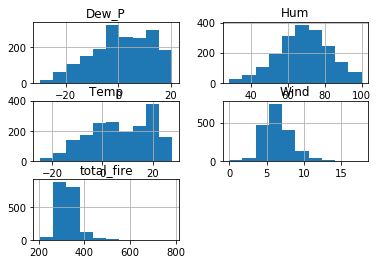

In [6]:
intervention.hist()

In [7]:
intervention.mean()

total_fire    327.009590
Temp            7.271893
Dew_P           1.265020
Hum            68.443446
Wind            6.468942
dtype: float64

In [8]:
intervention=intervention.fillna(intervention.mean())

In [9]:
intervention.info

<bound method DataFrame.info of        Date_time  total_fire       Temp      Dew_P        Hum       Wind
0       1/1/2013         414 -10.233333 -14.458333  69.000000   5.458333
1       1/1/2014         427 -17.925000 -23.666667  59.083333   6.041667
2       1/1/2015         411  -5.112500  -8.250000  76.333333  10.458333
3       1/1/2016         361  -1.479167  -2.875000  87.541667   5.166667
4       1/1/2017         395  -2.704167  -5.291667  80.875000   4.791667
5       1/1/2018         527 -21.320833 -26.666667  60.333333   7.791667
6       1/2/2013         346 -15.325000 -19.083333  70.291667   7.166667
7       1/2/2014         459 -24.870833 -29.833333  60.791667  12.125000
8       1/2/2015         342  -7.641667 -15.375000  52.708333   4.875000
9       1/2/2016         303  -1.525000  -4.166667  79.791667   7.250000
10      1/2/2017         347  -1.487500  -4.083333  80.500000   6.416667
11      1/2/2018         446 -17.829167 -20.916667  74.291667   6.333333
12      1/3/2013   

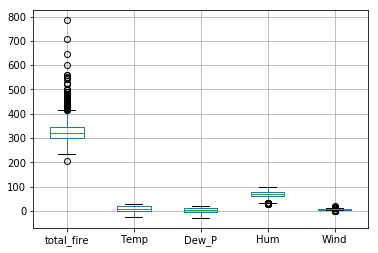

In [10]:
intervention.boxplot()

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
Ic=LinearRegression()
Ic.fit(X=intervention[['Temp']],y=intervention['total_fire'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
# regression parameters intercept is beta0 and coef_ is beta1
print(Ic.intercept_, Ic.coef_)

325.681128842 [ 0.18268433]


In [14]:
import statsmodels.formula.api as smf
model=smf.ols(formula='total_fire~Temp+Dew_P+Hum+Wind',data=intervention)
ir=model.fit()
ir.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             total_fire   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     8.595
Date:                Fri, 22 Feb 2019   Prob (F-statistic):           7.15e-07
Time:                        21:17:12   Log-Likelihood:                -9739.4
No. Observations:                1877   AIC:                         1.949e+04
Df Residuals:                    1872   BIC:                         1.952e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    148.7518     35.005      4.249      0.000      80.100     217.404
Temp           7.5709      1.559      4.856      0.000       4.513      10.629
Dew_P         -8.0372      1.699     -4.730      0.000     -11.369      -4.705
Hum            1.9543      0.379      5.161      0.000       1.212       2.697
Wind          -0.0603      0.520     -0.116      0.908      -1.080       0.959
==============================================================================
Omnibus:                     1064.777   Durbin-Watson:                   1.759
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17163.381
Skew:                           2.320   Prob(JB):                         0.00
Kurtosis:                      17.068   Cond. No.                     2.47e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""